## Tutorial 2 - Accessing biodiveristy data through web services

In this tutorial we will work with another r-package that can be used to download biodiversity data:

The IUCN redlist package `rredlist`

The IUCN RedList is a collective work of many researchers and conservaionists, which compile information about species population trends, habitats, and evaluations of all applicable threats. This information is used to assign a protection status to each species. You can find more information about the IUCN RedList [here](https://www.iucnredlist.org/).

Let's load the `rredlist` package:

In [1]:
library(rredlist)

### 1. Get your API token

In order to use this package you first need to apply for an API token. You can do that by filling out this form here: https://apiv3.iucnredlist.org/api/v3/token.

Since it is hard to predict how long it will take for IUCN to approve your token request, you can get a key from us (just approach us if you're getting to this part of the tutorial and haven't received your token yet).

Then store the API token as a string:

In [10]:
iucn_api = '01524b67f4972521acd1ded2d8b3858e7fedc7da5fd75b8bb2c5456ea18b01ba'

**Extra info:** If you're interested you can store this key in your R environment. It's not necessary for this exercise but if you want you can check out the documentation of the functions `rl_use_iucn()` and `edit_r_environ()`.

### 2. Pick a taxon and find synonyms

Now you can again pick a species of your choice, in this example we're working with the tiger _Panthera tigris_.

In [38]:
taxon_name <- "Panthera tigris" # tiger

We can check for synonyms of our species name, using the `rl_synonyms()` function:

In [37]:
rl_synonyms(taxon_name,key=iucn_api)

accepted_id,accepted_name,authority,synonym,syn_authority
15955,Panthera tigris,"(Linnaeus, 1758)",Felis tigris,"Linnaeus, 1758"


IUCN standardizes all its' data to one main taxonomy, so you will not find any data associated with the synonyms ooutside of the `accepted_name`. Therefore make sure you continue working with the `accepted_name`.

Similarly as before in the GBIF tutorial, we can extract **popular names (vernacular names)** associated with our chosen taxon in the IUCN database:

In [39]:
rl_common_names(taxon_name,key=iucn_api)

taxonname,primary,language
Tigre,FALSE,fre
Tiger,TRUE,eng


### 3. Habitat information

The IUCN `rredlist` package offers several functions to extract information about the chosen taxon. You can check out the available functions and explanation in the [official package documentation](https://cran.r-project.org/web/packages/rredlist/rredlist.pdf).

For example we can extract information about the habitats the species is found in using the `rl_habitats()` function.

In [40]:
rl_habitats(taxon_name,key=iucn_api)

code,habitat,suitability,season,majorimportance
1.1,Forest - Boreal,Suitable,NA,Yes
1.4,Forest - Temperate,Suitable,NA,Yes
1.5,Forest - Subtropical/Tropical Dry,Suitable,NA,Yes
1.6,Forest - Subtropical/Tropical Moist Lowland,Suitable,NA,Yes
1.7,Forest - Subtropical/Tropical Mangrove Vegetation Above High Tide Level,Suitable,NA,Yes
1.9,Forest - Subtropical/Tropical Moist Montane,Marginal,NA,NA
3.5,Shrubland - Subtropical/Tropical Dry,Suitable,NA,Yes
3.6,Shrubland - Subtropical/Tropical Moist,Suitable,NA,Yes
4.5,Grassland - Subtropical/Tropical Dry,Marginal,NA,NA
4.6,Grassland - Subtropical/Tropical Seasonally Wet/Flooded,Marginal,NA,NA


### 4. Threat status
One of the most interesting and unique information IUCN has to offer are the RedList assessments. Each species is classified into either one of the following categories:

- Least Concern (LC)

- Near threatened (NT)

- Vulnerable (VU)

- Endangered (EN)

- Critically endangered (CR)

- Extinct in the wild (EW)

- Extinct (EX)

- Data deficient (DD)

Let's see how our species is evaluated. We are using the `rl_search()` function which will return all sorts of information, but for now we're only interested in the `category` of the output:

In [41]:
threat_data = rl_search(taxon_name,key=iucn_api)
threat_data$result$category

[1] "EN"

We can also view the history of IUCN assessments of our species and see if the trends have improved or worsened. Note that older evaluations may contain different categories, since IUCN has changed its' nomenclature several times in history:

In [42]:
rl_history(taxon_name,key=iucn_api)

year,code,category
2015,EN,Endangered
2011,EN,Endangered
2010,EN,Endangered
2008,EN,Endangered
2002,EN,Endangered
1996,EN,Endangered
1994,E,Endangered
1990,E,Endangered
1988,E,Endangered
1986,E,Endangered


### 5. Extract geographic information

Unfortunately it is not possible to download range maps for your species via the package rredlist (to our knowledge), even though IUCN has range maps for most species in their database stored on their server. Precise range maps can instead be [downloaded manually via the webpage](https://www.iucnredlist.org/resources/spatial-data-download).

However the `rredlist` package offers a function `rl_occ_country()` which can be used to extract a list of countries where the species exists:

In [43]:
occurrence_countries = rl_occ_country(taxon_name,key=iucn_api)
occurrence_countries

code,country,presence,origin,distribution_code
AF,Afghanistan,Extinct Post-1500,Native,Regionally Extinct
BD,Bangladesh,Extant,Native,Native
BT,Bhutan,Extant,Native,Native
CN,China,Extant,Native,Native
ID,Indonesia,Extant,Native,Native
IN,India,Extant,Native,Native
IR,"Iran, Islamic Republic of",Extinct Post-1500,Native,Regionally Extinct
KG,Kyrgyzstan,Extinct Post-1500,Native,Regionally Extinct
KH,Cambodia,Possibly Extinct,Native,Possibly Extinct
KP,"Korea, Democratic People's Republic of",Possibly Extinct,Native,Possibly Extinct


As you can see, the output also contains the information if the species is extant or extinct in the country where it was once found. In the next step we use this information to plot a world map with countries highlighted where our species has been found, with different coloring depending on if the species is extinct or extant in the respective country.

### 6. Plotting geographic information

First let's turn the `presence` column, which contain the info if the taxon is extinct/extant in each country, into an array of 0 (extinct) and 1 (extant), in order to use this information for plotting:

In [49]:
extant_extinct = occurrence_countries$result$presence
extant_extinct[extant_extinct != "Extant"] <- 0
extant_extinct[extant_extinct == "Extant"] <- 1


Now let's extract the list of countries where our species has been found:



In [50]:
theCountries <- c(occurrence_countries$result$code) # ISO2 country codes
theCountries

[1] "AF" "BD" "BT" "CN" "ID" "IN" "IR" "KG" "KH" "KP" "KZ" "LA" "MM" "MY" "NP"
[16] "PK" "RU" "SG" "TH" "TJ" "TM" "TR" "UZ" "VN"

Now let's merge the list with our extinct/extant info with the list of the country names into one dataframe:

In [51]:
extDF <- data.frame(country = c(occurrence_countries$result$code),
  extant = c(extant_extinct))
extDF

country,extant
AF,0
BD,1
BT,1
CN,1
ID,1
IN,1
IR,0
KG,0
KH,0
KP,0


Now we will use the `rworldmap` package, which provides a function that allows us to find the countries on the world map based on their ISO2 codes:

In [52]:
library(rworldmap)

extMap <- joinCountryData2Map(extDF, joinCode = "ISO2", nameJoinColumn = "country")
# This will join your data.frame to the country map data


24 codes from your data successfully matched countries in the map
0 codes from your data failed to match with a country code in the map
219 codes from the map weren't represented in your data


Finally we can plot the map with the countries of presence of our species highlighted in red and the countires where the species went extinct in yellow:

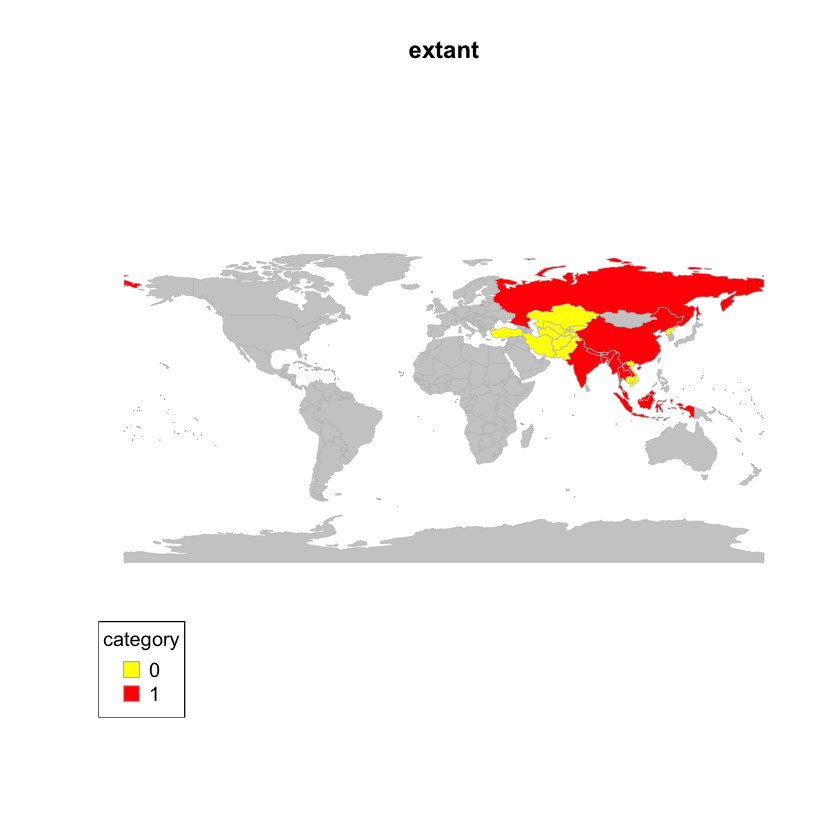

In [53]:
mapCountryData(extMap, nameColumnToPlot="extant", catMethod = "categorical",
  missingCountryCol = gray(.8))
# And this will plot it, with the trick that the color palette's first
# color is red

## Resolving taxon names

Often in biology we are confronted with taxon names or lists of taxon names, and we need to somehow retrieve data for these taxa from public databases (as we did in the previous tutorial steps). The challenge here is usually to find the correct species name, since taxonomies can vary between databases and between different authors. Luckily there are great tools to standardize and resolve taxonomic issues in many cases, implemented in the `taxize` package.

The `taxize` package provides access to taxonomic information sourced from many databases, among them the Global Names Resolver (GNR) service provided by the [Encyclopedia of Life](http://eol.org/). The advantage of `taxize` is that it is primarily designed for resolving taxonomic issues and thus has many useful functions for this purpose, compared to some similar but more simplified functionalities of the `rgbif` and `rredlist` packages we have seen in the previous tutorial steps.

Let's first load the package.


In [55]:
library(taxize)

### 1. Finding correct taxon name for database

Let's say we have a list of species names and we want to know if our species are spelled correctly.

Here, we are searching for two misspelled names:

In [66]:
temp <- gnr_resolve(names = c("Pantera tigrsi", "Homo saapiens"))
temp

user_supplied_name,submitted_name,matched_name,data_source_title,score
Pantera tigrsi,Pantera tigrsi,"Panthera tigris (Linnaeus, 1758)",Catalogue of Life,0.75
Pantera tigrsi,Pantera tigrsi,"Panthera tigris (Linnaeus, 1758)",ITIS,0.75
Pantera tigrsi,Pantera tigrsi,Panthera tigris,NCBI,0.75
Pantera tigrsi,Pantera tigrsi,"Panthera tigris (Linnaeus, 1758)",Union 4,0.75
Pantera tigrsi,Pantera tigrsi,"Panthera tigris (Linnaeus, 1758)",The Interim Register of Marine and Nonmarine Genera,0.75
Pantera tigrsi,Pantera tigrsi,Panthera tigris,Freebase,0.75
Pantera tigrsi,Pantera tigrsi,"Panthera tigris (Linnaeus, 1758)",GBIF Backbone Taxonomy,0.75
Pantera tigrsi,Pantera tigrsi,"Panthera tigris (Linnaeus, 1758)",EOL,0.75
Pantera tigrsi,Pantera tigrsi,Panthera tigris,EOL,0.75
Pantera tigrsi,Pantera tigrsi,"Panthera tigris (Linnaeus, 1758)",TaxonConcept,0.75


Here you can find the database you want to download data from and use the according correct species name (can vary between databases).

### 2. Getting species list for higher taxon
Let's say we have a taxonomic family name and want to find all species belonging to this family, for example all dogs of the family Canidae.

A number of data sources in taxize provide the capability to retrieve higher taxonomic names, we will be using the  [Catalogue of Life (COL)](http://www.catalogueoflife.org/).

In [82]:
species_output = downstream("Canidae", downto = "Species", db = "col")
species_output


Retrieving data for taxon 'Canidae'




$Canidae
                       childtaxa_id           childtaxa_name childtaxa_rank
1  5f3ddd0e635c5fb11690722f002dbdfa      Atelocynus microtis        species
2  36807bbc8e4efedbea119a1144c0dae3            Canis adustus        species
3  cbc6668c8147b2292e3ab4b57696cc35             Canis anthus        species
4  2d360d349c645ad93fd960ae988101e9             Canis aureus        species
5  04afba115065ca57c2ea8f64fe876579            Canis latrans        species
6  f942db24200d36657e3e0e5d270b66cb           Canis lupaster        species
7  bcd6035778291a7feaad52cb7ac167cb              Canis lupus        species
8  3f5e32547d4f78fbd3e3dd4755a27166          Canis mesomelas        species
9  e2c274e049e7a12fa066f96028092720           Canis simensis        species
10 9491363ed5ec89660e88360f5b26371d          Cerdocyon thous        species
11 0b3e53b24ae32db8b7f60d943b8c3814    Chrysocyon brachyurus        species
12 59a93bdf80e76056b2e314cf0b036f9c             Cuon alpinus        species
13 

You can now extract the list of all species belonging to your chosen family:

In [83]:
species_list = species_output$Canidae$childtaxa_name
species_list

[1] "Atelocynus microtis"      "Canis adustus"           
 [3] "Canis anthus"             "Canis aureus"            
 [5] "Canis latrans"            "Canis lupaster"          
 [7] "Canis lupus"              "Canis mesomelas"         
 [9] "Canis simensis"           "Cerdocyon thous"         
[11] "Chrysocyon brachyurus"    "Cuon alpinus"            
[13] "Dusicyon australis"       "Lycalopex culpaeus"      
[15] "Lycalopex fulvipes"       "Lycalopex gymnocercus"   
[17] "Lycalopex sechurae"       "Lycalopex vetulus"       
[19] "Lycaon pictus"            "Nyctereutes procyonoides"
[21] "Otocyon megalotis"        "Speothos venaticus"      
[23] "Urocyon cinereoargenteus" "Urocyon littoralis"      
[25] "Vulpes bengalensis"       "Vulpes cana"             
[27] "Vulpes chama"             "Vulpes corsac"           
[29] "Vulpes ferrilata"         "Vulpes lagopus"          
[31] "Vulpes macrotis"          "Vulpes pallida"          
[33] "Vulpes rueppellii"        "Vulpes velox"            
[35] "Vulpes vulpes"            "Vulpes zerda"

## Assignment 1

Now where you have a basic overview over the use of the `rgbif`, `rredlist`, and `taxize` packages, you are ready to approach a bioinformatic task based on biodiversity data:

Your supervisor asks you for help with a project about the cat family `Felidae`. Your task is to **create a map of global occurrences of this family, colored by species**. Further your supervisor asks you to retrieve a **list of IUCN threat statuses for all species of this family** (if you like a challenge, you can also create a second plot, colored by threat status instead of colored by species).

Since these data are supposed to be used in a publication, your supervisor expects you as a properly trained biodiversity data wizard to provide a DOI assigned dataset of `Felidae` occurrence records to be cited in the study.


_Tips for assignment:_

There are different ways of solving this task, one approach could be:

1. create a download request containing all records assigned to the taxon `Felidae`, using the `rgbif::occ_download()` function 
2. download the data and load into R (step 8 in the first tutorial)
3. export the DOI reference of the data download (step 8 in the first tutorial)
4. plot occurrences colored by name (step 8 in the first tutorial)
5. retrieve a species list of the family `Felidae`, using the `taxize` package
6. get the IUCN RedList status for each species, using the `rredlist::rl_search()` function

## Assignment 2

For the very fast and motivated people among you:

You are being asked to produce a map that contains the range map (according to IUCN) and all occurrences (according to GBIF) for the African elephant. For this purpose you need to download the actual range data from IUCN, which can only be downloaded as a big data-package, containing ranges of all mammal species ([download here](https://www.iucnredlist.org/resources/files/bcfb6dac-60e6-4f0e-a027-02df540e512e)).

This task requires you to know some basics about reading and plotting shape data, which we covered in a previous workshop. Check out the [online module of that workshop](https://github.com/tobiashofmann88/workshops/tree/master/spatial_r_workshop/introduction_and_tutorials) in case you are stuck.